<a href="https://colab.research.google.com/github/OmidGhadami95/EfficientNet-PlantVillage/blob/main/EfficientNet_PlantVillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset
%cd PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 29.76 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.
/content/PlantVillage-Dataset


In [ ]:
import os
fpath = "/content/PlantVillage-Dataset/raw/color"
random_seed = 111

categories = os.listdir(fpath)

In [ ]:
os.listdir(fpath)

['Peach___Bacterial_spot',
 'Potato___Early_blight',
 'Grape___Black_rot',
 'Soybean___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Target_Spot',
 'Corn_(maize)___healthy',
 'Apple___Apple_scab',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Raspberry___healthy',
 'Strawberry___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Apple___Cedar_apple_rust',
 'Tomato___healthy',
 'Cherry_(including_sour)___healthy',
 'Potato___healthy',
 'Grape___Esca_(Black_Measles)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Apple___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Late_b

In [ ]:
categories.remove("Tomato___Tomato_Yellow_Leaf_Curl_Virus")
categories.remove("Tomato___Target_Spot")
categories.remove("Tomato___Tomato_mosaic_virus")
categories.remove("Tomato___Bacterial_spot")
# categories.remove("Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
categories.remove("Apple___Cedar_apple_rust")
categories.remove("Cherry_(including_sour)___healthy")
categories.remove("Apple___healthy")
categories.remove("Pepper,_bell___healthy")
categories.remove("Tomato___Septoria_leaf_spot")
categories.remove("Squash___Powdery_mildew")
# categories.remove("Corn_(maize)___Northern_Leaf_Blight")
categories.remove("Peach___healthy")
categories.remove("Tomato___Early_blight")
categories.remove("Cherry_(including_sour)___Powdery_mildew")
categories.remove("Tomato___Late_blight")
categories.remove("Grape___healthy")
# categories.remove("Corn_(maize)___healthy")
categories.remove("Raspberry___healthy")
categories.remove("Pepper,_bell___Bacterial_spot")
categories.remove("Tomato___healthy")
# categories.remove("Corn_(maize)___Common_rust_")
categories.remove("Apple___Black_rot")
categories.remove("Tomato___Spider_mites Two-spotted_spider_mite")
categories.remove("Potato___healthy")
categories.remove("Peach___Bacterial_spot")
categories.remove("Strawberry___healthy")
categories.remove("Grape___Black_rot")
categories.remove("Blueberry___healthy")
categories.remove("Apple___Apple_scab")
categories.remove("Soybean___healthy")
categories.remove("Orange___Haunglongbing_(Citrus_greening)")
categories.remove("Grape___Esca_(Black_Measles)")
categories.remove("Strawberry___Leaf_scorch")
categories.remove("Grape___Leaf_blight_(Isariopsis_Leaf_Spot)")
categories.remove("Potato___Late_blight")
categories.remove("Potato___Early_blight")
categories.remove("Tomato___Leaf_Mold")
print("All the class labels:- ",categories,"\n\nNo. of categories = ", len(categories))

All the class labels:-  ['Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_'] 

No. of categories =  4


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import utils,  optimizers, losses
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#from keras.layers.normalization import layer_normalization

In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:1300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                # print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 64 x 64 because the input image resolution for LeNet is 64 x 64
                resized_img = img_array.resize((64, 64))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3852 
No. of labels loaded =  3852
<class 'list'> <class 'list'>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3852, 64, 64, 3) 
Labels shape =  (3852,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3274, 64, 64, 3)
y_train shape =  (3274,)

x_test shape =  (578, 64, 64, 3)
y_test shape =  (578,)


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (2291, 64, 64, 3)
y_train shape =  (2291,)

x_val shape =  (983, 64, 64, 3)
y_val shape =  (983,)


In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))


((2291, 64, 64, 3), (2291, 4))
((983, 64, 64, 3), (983, 4))
((578, 64, 64, 3), (578, 4))


In [ ]:
# import numpy as np

# y_train = np.argmax(y_train, axis=1)


In [ ]:
print(y_train[20])

[0. 0. 0. 1.]


In [ ]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generatorENB0 = ImageDataGenerator()
val_generatorENB0 = ImageDataGenerator()
test_generatorENB0 = ImageDataGenerator()

In [ ]:
#Fitting the augmentation defined above to the data
train_generatorENB0.fit(x_train)
val_generatorENB0.fit(x_val)
test_generatorENB0.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [ ]:
!pip install keras_efficientnets

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [ ]:
#Defining the model
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(64,64,3),classes=y_train.shape[1])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers

ENmodel= Sequential()
ENmodel.add(base_model)
ENmodel.add(Flatten())

#Model summary
ENmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
Total params: 4049571 (15.45 MB)
Trainable params: 4007548 (15.29 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [ ]:
#Adding the Dense layers along with activation and batch normalization
ENmodel.add(Dense(1024,activation=('relu')))
ENmodel.add(Dense(512,activation=('relu')))
ENmodel.add(Dense(256,activation=('relu')))
#model.add(Dropout(.3))
ENmodel.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
ENmodel.add(Dense(4,activation=('softmax')))

In [ ]:
#Checking the final model summary
ENmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 1024)              5243904   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                        

In [ ]:
#Defining the parameters
batch_size= 30
epochs=50
learn_rate=.001

In [ ]:
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

In [ ]:
#Compiling the model
ENmodel.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
ENmodel.fit_generator(train_generatorENB0.flow(x_train, y_train, batch_size = batch_size), epochs = 15, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generatorENB0.flow(x_val, y_val, batch_size = batch_size), validation_steps = 1,  callbacks = [lrr], verbose = 1)

Epoch 1/15


<ipython-input-24-bf01679c2a77>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ENmodel.fit_generator(train_generatorENB0.flow(x_train, y_train, batch_size = batch_size), epochs = 15, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generatorENB0.flow(x_val, y_val, batch_size = batch_size), validation_steps = 1,  callbacks = [lrr], verbose = 1)


76/76 [==============================] - ETA: 0s - loss: 0.5296 - accuracy: 0.7952

76/76 [==============================] - 36s 73ms/step - loss: 0.5296 - accuracy: 0.7952 - val_loss: 0.5803 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 2/15
75/76 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9296

76/76 [==============================] - 4s 57ms/step - loss: 0.2196 - accuracy: 0.9301 - val_loss: 0.1034 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 3/15
76/76 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9580

76/76 [==============================] - 3s 45ms/step - loss: 0.1218 - accuracy: 0.9580 - val_loss: 0.0474 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 4/15
75/76 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9677

76/76 [==============================] - 3s 46ms/step - loss: 0.0925 - accuracy: 0.9682 - val_loss: 0.5009 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 5/15
76/76 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9721

76/76 [==============================] - 4s 54ms/step - loss: 0.0804 - accuracy: 0.9721 - val_loss: 0.3189 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 6/15
76/76 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9903

76/76 [==============================] - 3s 45ms/step - loss: 0.0341 - accuracy: 0.9903 - val_loss: 0.0923 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 7/15
75/76 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.9848

76/76 [==============================] - 3s 43ms/step - loss: 0.0414 - accuracy: 0.9850 - val_loss: 0.2449 - val_accuracy: 0.9333 - lr: 0.0100
Epoch 8/15
76/76 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9867

76/76 [==============================] - 4s 50ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.2497 - val_accuracy: 0.9333 - lr: 0.0100
Epoch 9/15
76/76 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9934

76/76 [==============================] - 4s 50ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.0147 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 10/15
76/76 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9872

76/76 [==============================] - 3s 44ms/step - loss: 0.0355 - accuracy: 0.9872 - val_loss: 0.1051 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 11/15
76/76 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9876

76/76 [==============================] - 3s 44ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.1142 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 12/15
76/76 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9929

76/76 [==============================] - 4s 57ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.1431 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 13/15
75/76 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9910

76/76 [==============================] - 3s 43ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.2480 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 14/15
76/76 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9943

76/76 [==============================] - 3s 44ms/step - loss: 0.0284 - accuracy: 0.9943 - val_loss: 0.5508 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 15/15
75/76 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9901

76/76 [==============================] - 4s 55ms/step - loss: 0.0252 - accuracy: 0.9898 - val_loss: 0.0526 - val_accuracy: 0.9667 - lr: 0.0100


In [ ]:
# import matplotlib.pyplot as plt
# #Plotting the training and validation loss

# f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
# #Assigning the first subplot to graph training loss and validation loss
# ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
# ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

# #Plotting the training accuracy and validation accuracy
# ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
# ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

# plt.legend()


In [ ]:
# score = ENmodel.evaluate(x_test, y_test)
# print('Test score:', score)
# print('Test loss:', score[0])

In [ ]:
!pip install scikit-learn

In [ ]:
!install scipy

install: missing destination file operand after 'scipy'
Try 'install --help' for more information.


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
!pip uninstall sklearn
!pip uninstall scikit-learn
!pip install sklearn

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.3.0
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


72/72 [==============================] - 1s 12ms/step


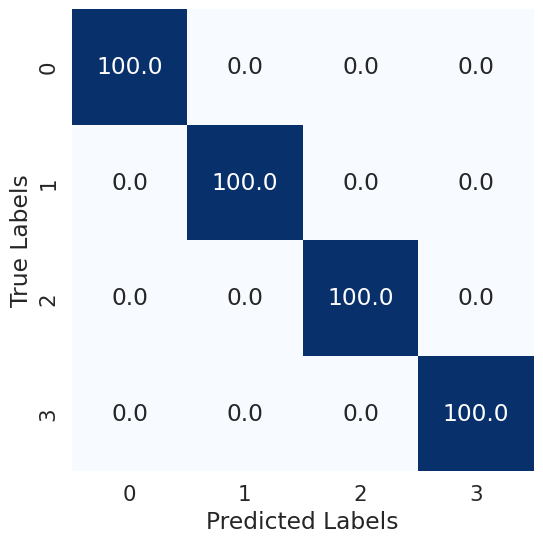

In [ ]:
predictions = ENmodel.predict(x_train, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_train, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
class_counts = np.unique(true_labels, return_counts=True)[1]
class_percents = np.round(100 * class_counts / sum(class_counts), decimals=1)
class_names = sorted(np.unique(true_labels))
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
sns.heatmap(np.round(100 * cm / cm.sum(axis=1)[:, np.newaxis], decimals=1), annot=True, fmt='',
            cmap="Blues", cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

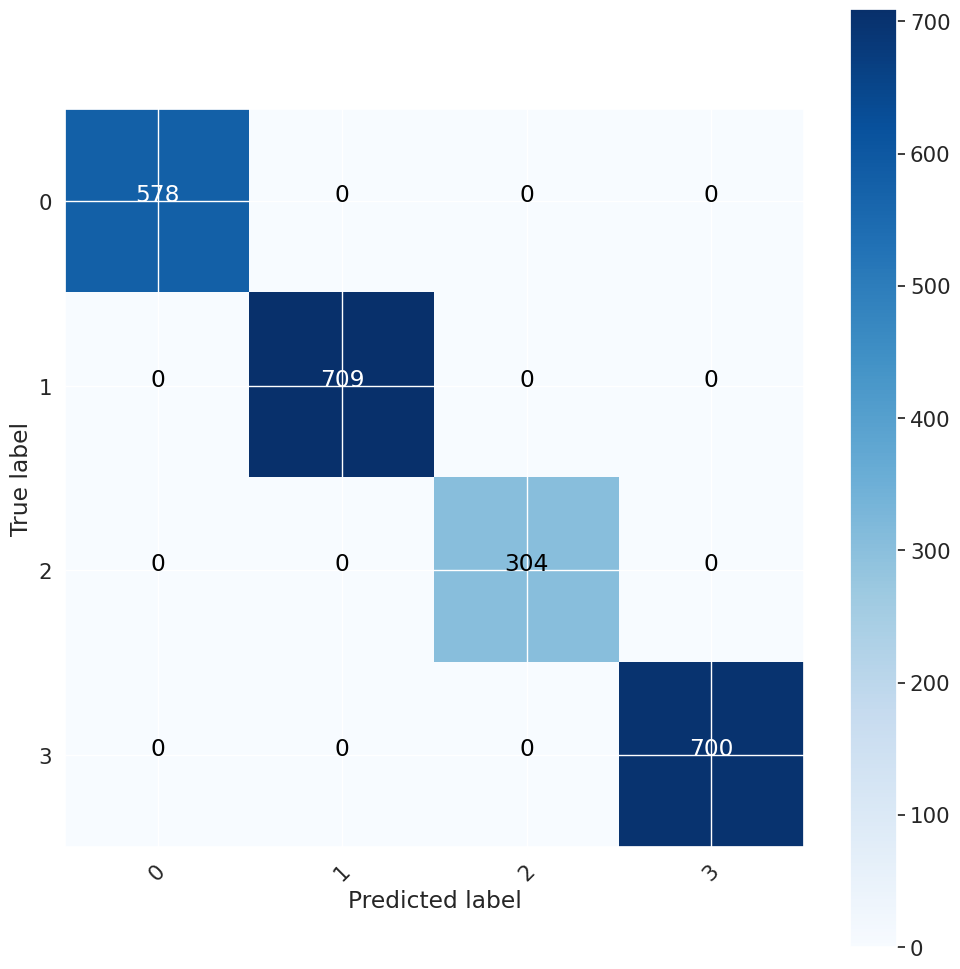

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(true_labels, predicted_labels)
class_names = sorted(np.unique(true_labels))

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=class_names, normalize=False)
plt.show()

In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#training the classifier using X_Train and y_train
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)

ValueError: ignored

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
epochs = 30
batch_size = 32
Y_pred = model.predict_generator(x_test, batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(x_test.classes, y_pred))
cm = confusion_matrix(x_test.classes, y_pred)
print('Classification Report')
target_names = ['Corn_maize___Cercospora_leaf_spot Gray_leaf_spot','Corn_maize___Common_rust_','Corn_maize___Northern_Leaf_Blight','Corn_maize___healthy']
print(classification_report(x_test.classes, y_pred, target_names=target_names))

<ipython-input-28-8df641e7d80b>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(x_test, batch_size+1)


Confusion Matrix


AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pandas as pd
cm_df = pd.DataFrame(cm,
                     index = ['Corn_maize___Cercospora_leaf_spot Gray_leaf_spot','Corn_maize___Common_rust_','Corn_maize___Northern_Leaf_Blight','Corn_maize___healthy'],
                     columns = ['Corn_maize___Cercospora_leaf_spot Gray_leaf_spot','Corn_maize___Common_rust_','Corn_maize___Northern_Leaf_Blight','Corn_maize___healthy'])

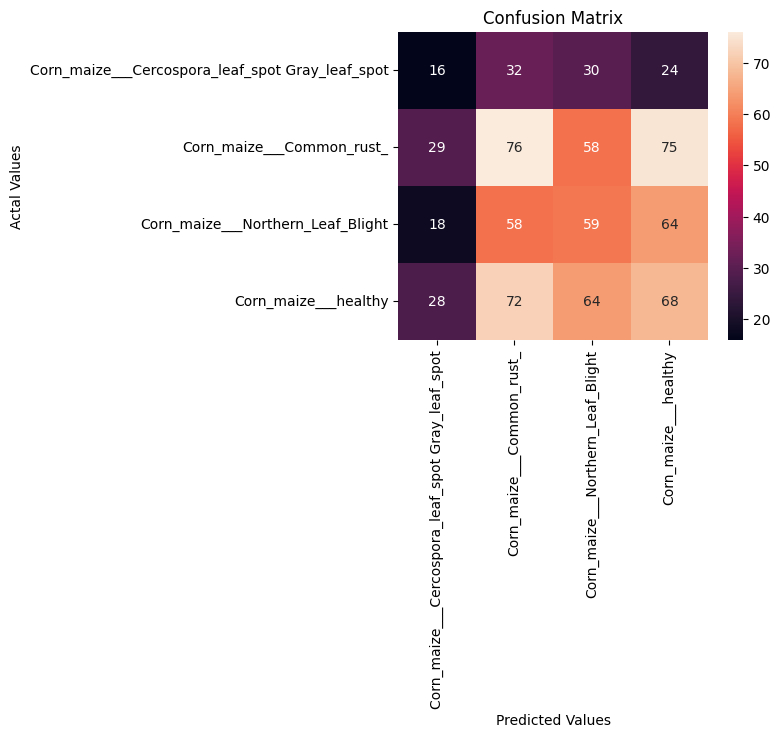

In [ ]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

TypeError: ignored

In [ ]:
CLASS_NAMES= ['Corn_maize___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_maize___Common_rust_','Corn_maize___Northern_Leaf_Blight','Corn_maize___healthy']

AttributeError: ignored

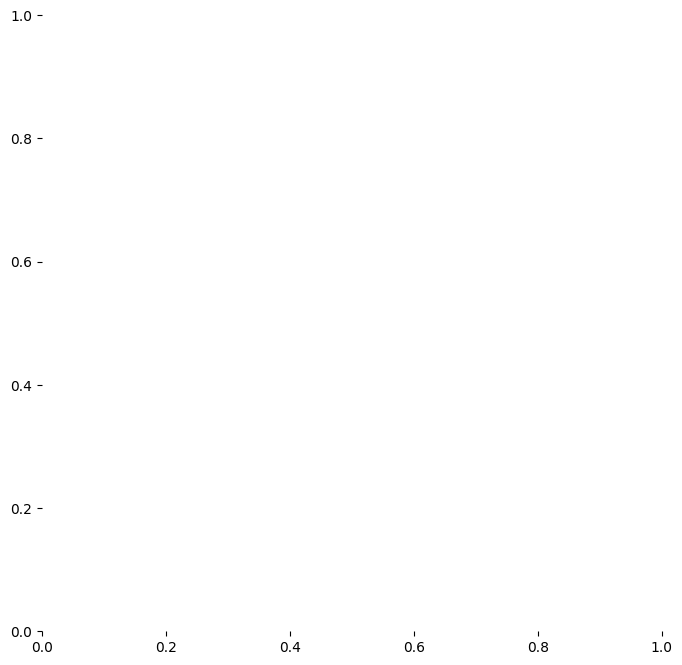

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(result, annot=True,cmap=plt.cm.Blues, display_labels=CLASS_NAMES)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
y_pred = model.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()


AttributeError: ignored

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_true = []
y_predicted = []
bads =[]
images = []
for image,label in y_test:
    for i in label:
        y_true.append(i.numpy())
    for i in model.predict(image,verbose=0):
       y_predicted.append(np.argmax(i))
    for i in image:
        images.append(image)
for i in range(len(images)):
    if y_true[i] != y_predicted[i]:
        bads.append(images[i])
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
cm = confusion_matrix(y_true, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = categories)
disp.plot()
plt.show()
print(len(bads))

TypeError: ignored

In [ ]:
#Making prediction
y_pred=model.predict=(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

AxisError: ignored

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_true = []
y_predicted = []
bads =[]
images = []
for image,label in test_ds:
    for i in label:
        y_true.append(i.numpy())
    for i in model.predict(image,verbose=0):
       y_predicted.append(np.argmax(i))
    for i in image:
        images.append(image)
for i in range(len(images)):
    if y_true[i] != y_predicted[i]:
        bads.append(images[i])
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
cm = confusion_matrix(y_true, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()
print(len(bads))